In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180

In [2]:
import numpy as np

def y_value(a, b, x):
    """Get positive y value of the curve given x"""
    return pow(pow(x, 3) + x * a + b, 0.5)

class Point:
    def __init__(self, x=float('inf'), y=float('inf')):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return "Point({}, {})".format(self.x, self.y)
    
    def __add__(self, other):
        assert type(other) is Point
        if self.x == other.x and self.y == other.y:
            return self.double()
        dx = other.x - self.x
        dy = other.y - self.y
        if dx == 0:
            return Point()
        slope = dy / dx
        x = (slope ** 2) - self.x - other.x
        y = slope * x + (self.y - slope * self.x)
        return Point(x, -y)
    
    def double(self):
        slope = (3 * (self.x ** 2) + A) / (2 * self.y)
        x = (slope ** 2) - (2 * self.x)
        y = slope * x + (self.y - slope * self.x)
        return Point(x, -y)
    
    def oppsite(self):
        return Point(self.x, -self.y)
    
    def np(self):
        return np.array([self.x, self.y])
    

In [3]:
import matplotlib.pyplot as plt

def plot_ec(pA, pB):
    y, x = np.ogrid[-10:10:100j, -10:10:100j]
    z = pow(y, 2) - pow(x, 3) - x * pA - pB

    plt.contour(x.ravel(), y.ravel(), z, [0])
    plt.axhline(y=0, color='r')
    plt.axvline(x=0, color='b')

def plot_negation_point_curve(ecA, ecB, p0, p1, p0_annotation, p1_annotation, third_point_annotation, sum_point_annotation):
    plot_ec(ecA, ecB) 
    
    p1 = p0.oppsite()
    
    line0 = np.array([
        p0.np(),
        p1.np()
    ])
    plt.plot(line0[:,0], line0[:,1], marker='o')
    plt.annotate(p0_annotation, xy=line0[0], xytext=(-5, 5), textcoords='offset points')
    plt.annotate(p1_annotation, xy=line0[1], xytext=(-10, -10), textcoords='offset points')


    plt.grid()
    plt.show()        
    
def plot_point_curve(ecA, ecB, p0, p1, p0_annotation, p1_annotation, third_point_annotation, sum_point_annotation):
    plot_ec(ecA, ecB)
    
    p2 = p0 + p1

    line0 = np.array([
        p0.np(),
        p2.oppsite().np(),
        p1.np()
    ])
    plt.plot(line0[:,0], line0[:,1], marker='o')
    plt.annotate(p0_annotation, xy=line0[0], xytext=(-5, 5), textcoords='offset points')
    plt.annotate(p1_annotation, xy=line0[2], xytext=(-5, 5), textcoords='offset points')
    plt.annotate(third_point_annotation, xy=line0[1], xytext=(-5, 5), textcoords='offset points')


    plt.grid()
    plt.show()    

def plot_distinct_point_curve(ecA, ecB, p0, p1, p0_annotation, p1_annotation, third_point_annotation, sum_point_annotation):
    plot_ec(ecA, ecB)
    
    p2 = p0 + p1

    line0 = np.array([
        p0.np(),
        p2.oppsite().np(),
        p1.np()
    ])
    plt.plot(line0[:,0], line0[:,1], marker='o')
    plt.annotate(p0_annotation, xy=line0[0], xytext=(-5, 5), textcoords='offset points')
    plt.annotate(p1_annotation, xy=line0[2], xytext=(-5, 5), textcoords='offset points')
    plt.annotate(third_point_annotation, xy=line0[1], xytext=(-5, 5), textcoords='offset points')

    
    line1 = np.array([
        p2.oppsite().np(),
        p2.np()
    ])
    plt.plot(line1[:,0], line1[:,1], marker='o')
    plt.annotate(sum_point_annotation, xy=line1[1], xytext=(0, 5), textcoords='offset points')

    plt.grid()
    plt.show()
    

def plot_double_point_curve(ecA, ecB, p, p_annotation, sum_point_annotation):
    plot_ec(ecA, ecB)
    
    p2 = p.double()

    line0 = np.array([
        p.np(),
        p2.oppsite().np(),
    ])
    plt.plot(line0[:,0], line0[:,1], marker='o')
    plt.annotate(p_annotation, xy=line0[0], xytext=(-5, 5), textcoords='offset points')

    line1 = np.array([
        p2.oppsite().np(),
        p2.np()
    ])
    plt.plot(line1[:,0], line1[:,1], marker='o')
    plt.annotate(sum_point_annotation, xy=line1[1], xytext=(0, 5), textcoords='offset points')

    plt.grid()
    plt.show()
    

def plot_n_point_curve(ecA, ecB, p, n, p_annotation, sum_point_annotation):
    plot_ec(ecA, ecB)
    
    current_p = p
    for _ in range(n):
        current_p += p

    line0 = np.array([
        p.np(),
        current_p.np(),
    ])
    plt.plot(line0[:,0], line0[:,1], linestyle='--', marker='o')
    plt.annotate(p_annotation, xy=line0[0], xytext=(-5, 5), textcoords='offset points')
    plt.annotate(sum_point_annotation, xy=line0[1], xytext=(-5, 5), textcoords='offset points')

    plt.grid()
    plt.show()


Krzywa eliptyczna to krzywa opisana następującym wzorem:

$y^2=x^3+ax+b$

Niech $a=−3.5$ i $b=5$, wówczas krzywa ma postać:

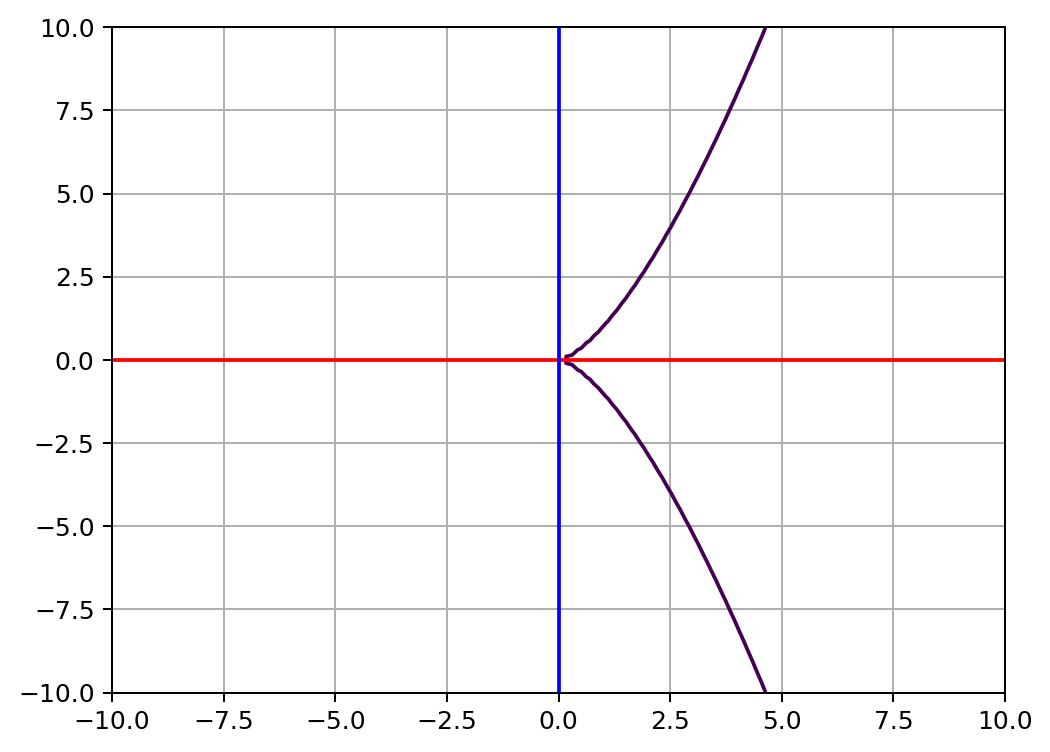

In [4]:
plot_ec(0, 0)
plt.grid()
plt.show()

### Jeśli punkty są współliniowe to ich suma jest równa 0: A+B+C = 0

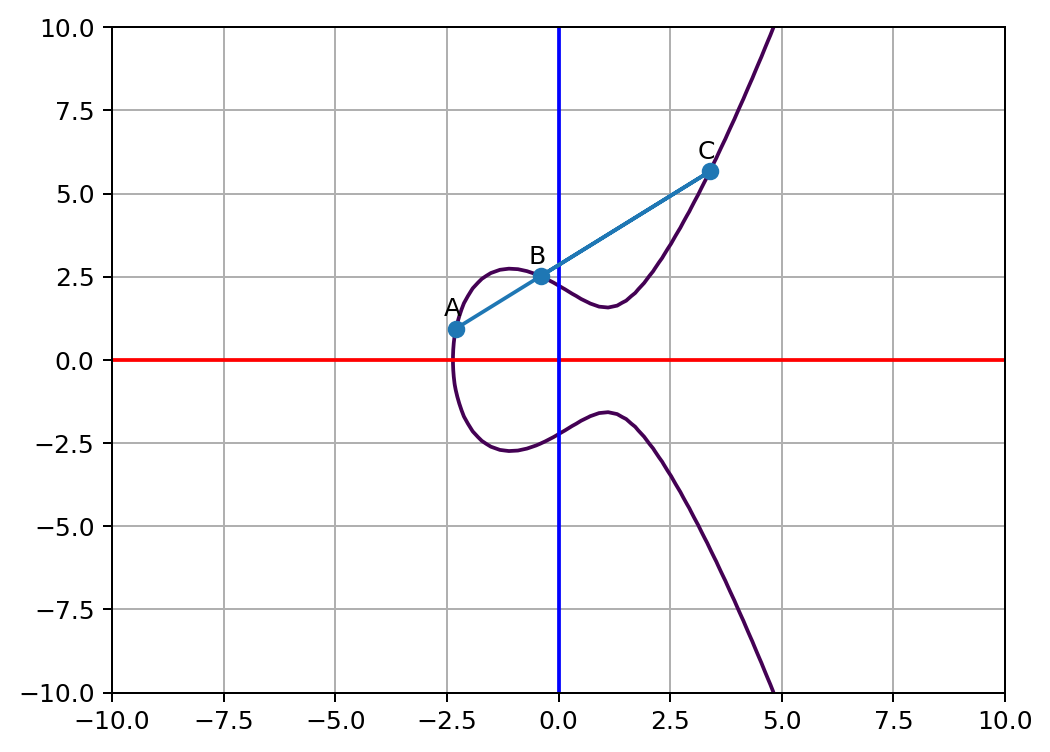

In [5]:
A = -3.5
B = 5
a = Point(-2.3, y_value(A, B , -2.3))
b = Point(-0.4, y_value(A, B, -0.4))
c = Point(-2.2, y_value(A, B, -2.2))
ab = a + b
bc = b + c
plot_point_curve(A, B,
    a, b,
    'A', 'B', 'C', ''
)

### Negacja punktu na krzywej eliptycznej 

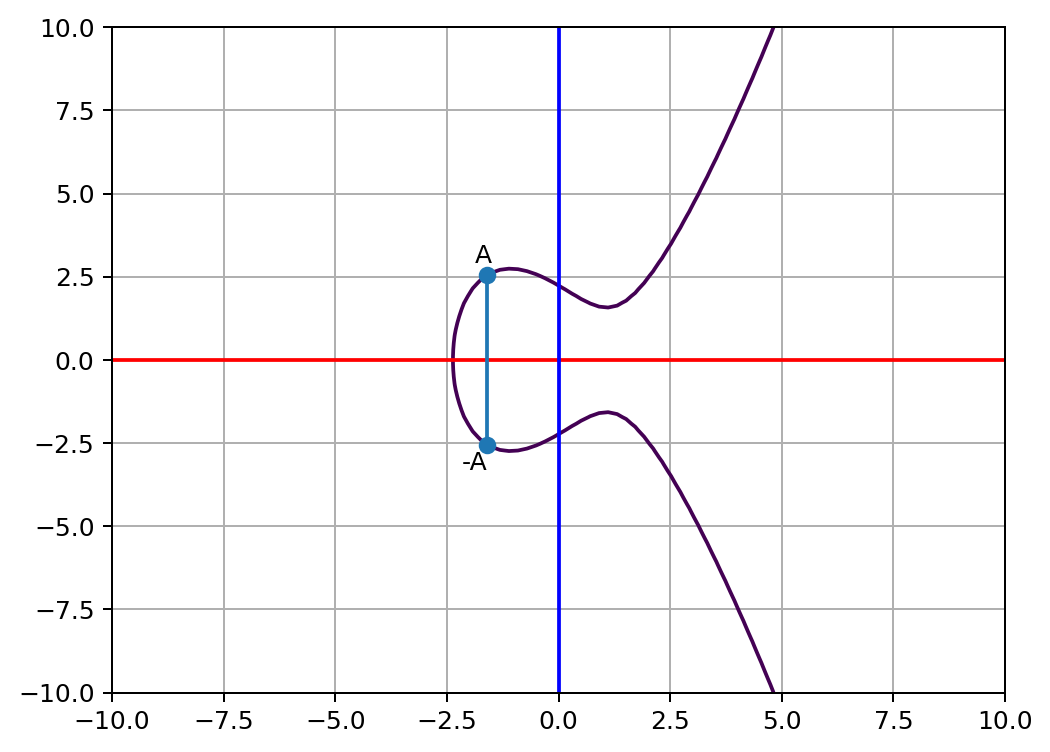

In [6]:
A = -3.5
B = 5
a = Point(-1.6, y_value(A, B , -1.6))
b = Point(-1.6, y_value(A, B, -1.6))

plot_negation_point_curve(A, B,
    a, b,
    'A', '-A', '', ''
)

### Dodawanie punktów 

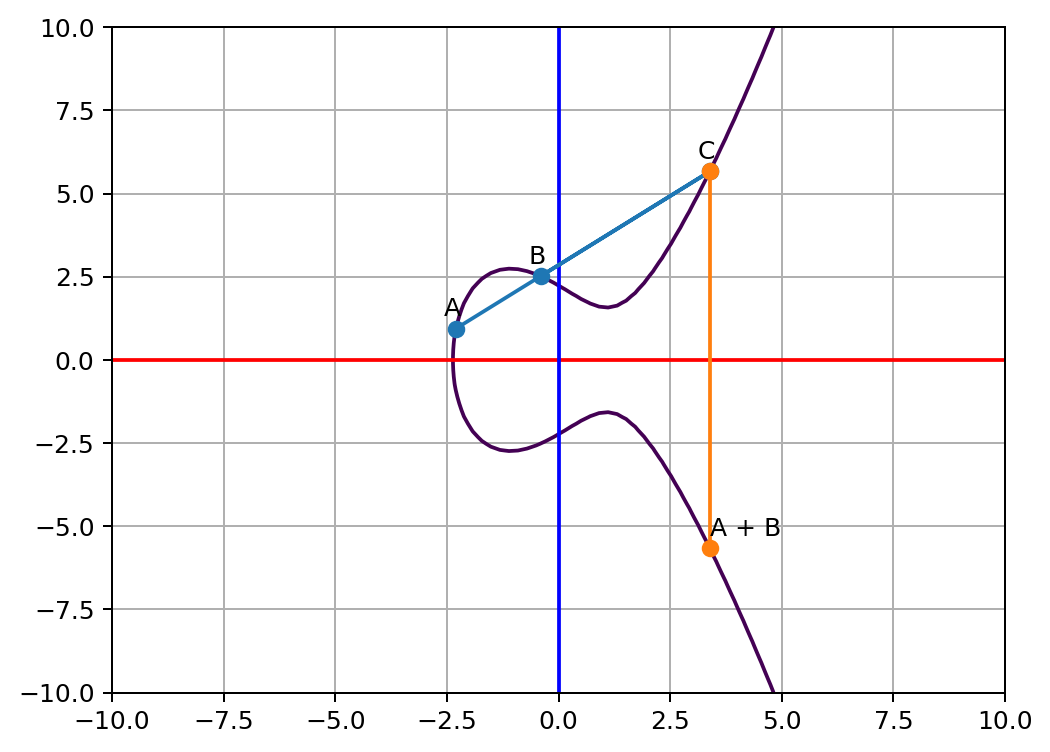

In [7]:
A = -3.5
B = 5

a = Point(-2.3, y_value(A, B , -2.3))
b = Point(-0.4, y_value(A, B, -0.4))
c = Point(-2.2, y_value(A, B, -2.2))

plot_distinct_point_curve(-3.5, 5,
    a, b,
    'A', 'B', 'C', 'A + B'
)
#A+B+C=0 -> A+B = -C

### Jak obliczyć współrzędne punktu będącego sumą dwóch różnych punktów na krzywej 
$x_{AB} = m^2 +x_A-x_B$

$y_{AB} = m(x_A-x_B) - y_A$

$m=\frac{y_B -y_A}{x_B-x_A}$


### Łączność dodawania 

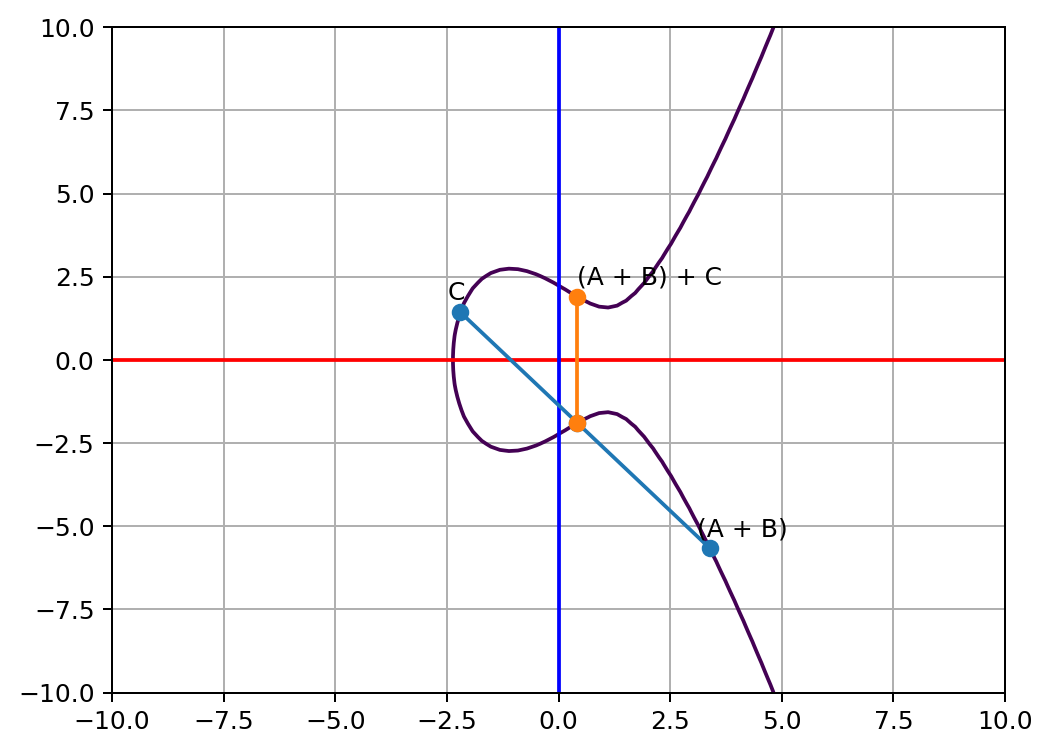

In [8]:
ab = a + b
bc = b + c

plot_distinct_point_curve(-3.5, 5,
    ab, c,
    '(A + B)', 'C', '', '(A + B) + C'
)

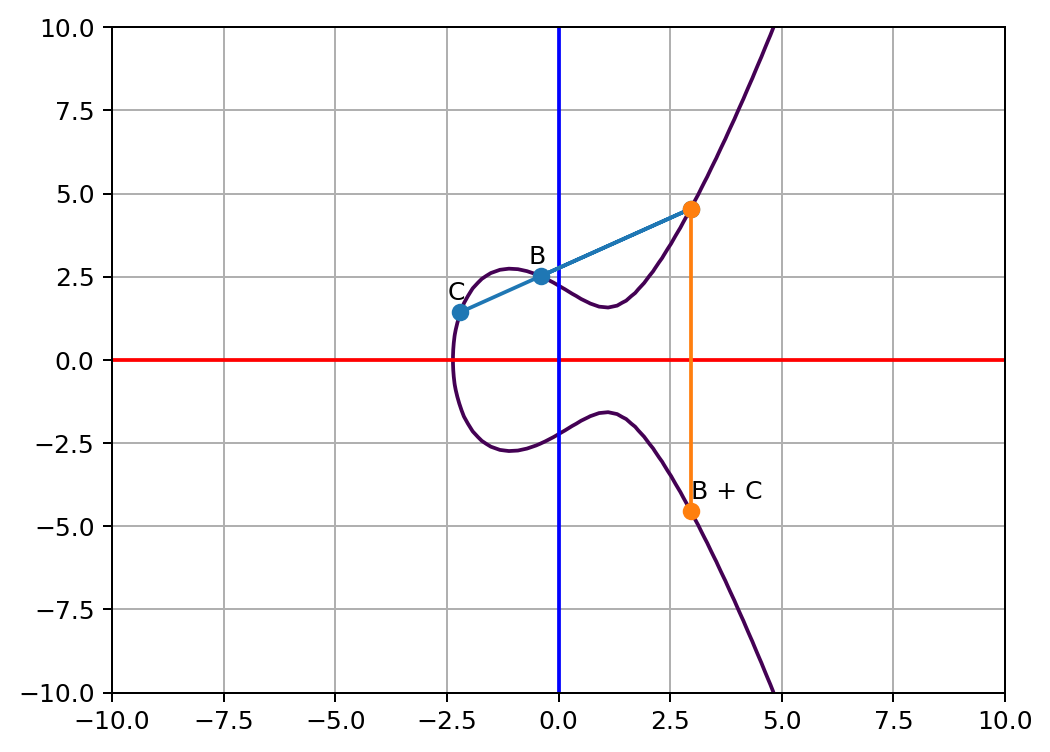

In [9]:
plot_distinct_point_curve(-3.5, 5,
    b, c,
    'B', 'C', '', 'B + C'
)

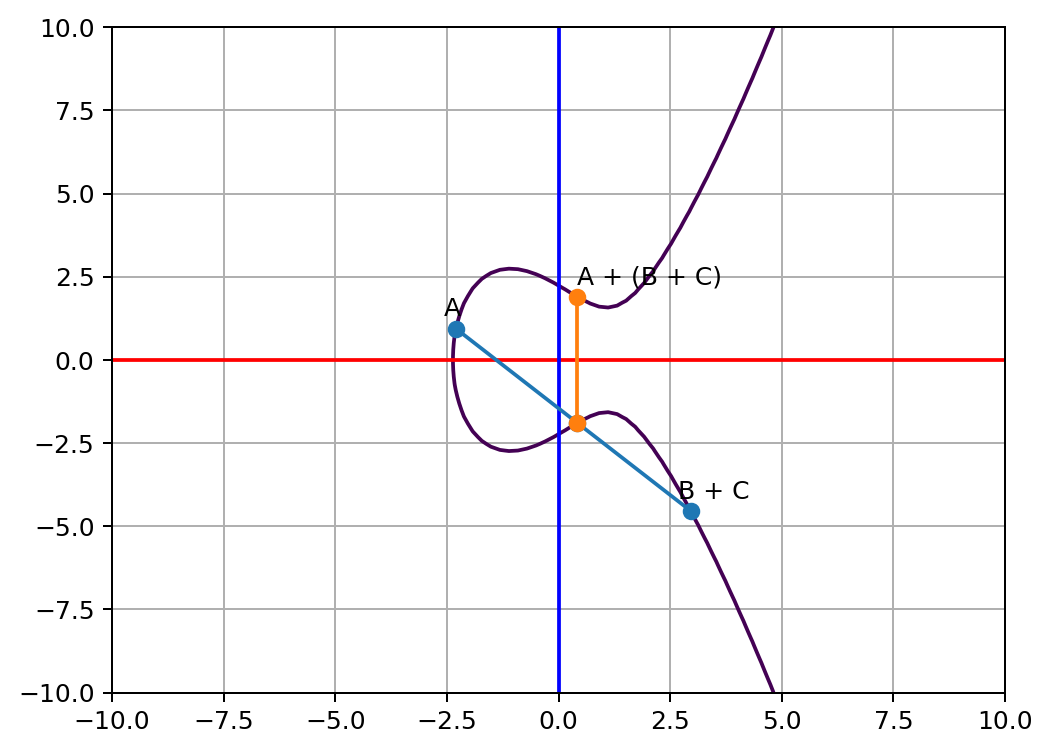

In [10]:
plot_distinct_point_curve(-3.5, 5,
    a, bc,
    'A', 'B + C', '', 'A + (B + C)'
)

Dodawanie liczba na krzywych eliptycznych jest łączne. Różnice w wartościach poniżej wynikają z błędów zaokrągleń. 

In [11]:
ab_c = ab + c
a_bc = a + bc
(ab_c, a_bc)

(Point(0.4223467696291585, 1.8966083330363734),
 Point(0.42234676962915874, 1.896608333036374))

### Podwajanie punktu 
Jeżeli punkty $A$ i $B$ leżą w tym samym miejscu ich dodawanie określamy mianem podwajania $A$ + $A$ = $2A$. W reprezentacji geometrycznej zamiast prostej przechodzącej przez dwa punkty używamy **stycznej** .  

### Jak obliczyć współrzędne punktu będącego sumą dwóch tych samych punktów na krzywej 
$x_{2A} = m^2 +x_A-x_{A'}$

$y_{2A} = m(x_A-x_{A'}) - y_A$

$m=\frac{3x_A^2 -a}{2y_A}$


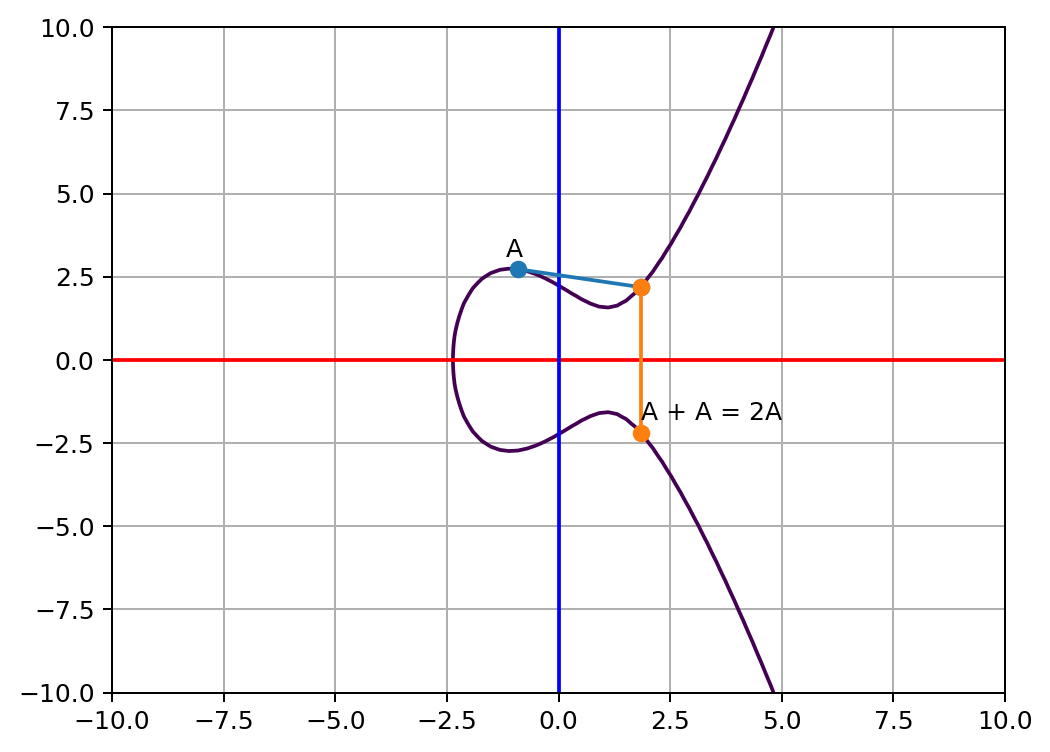

In [12]:
p = Point(-0.9, y_value(A, B, -0.9))
plot_double_point_curve(-3.5, 5,p, "A", "A + A = 2A")

### Mnożenie punktu przez liczbę całkowitą 
Mnożenie przez liczbą całkowitą można uzyskać łącząc dodawanie i podwajanie

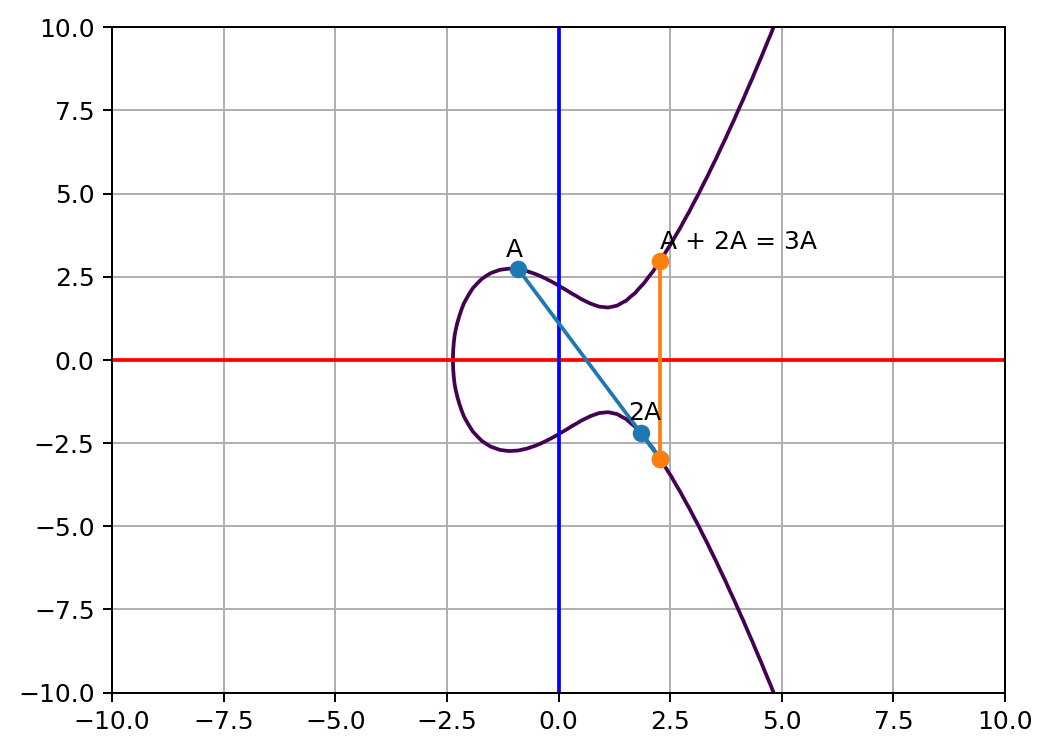

In [13]:
p2 = p.double()
plot_distinct_point_curve(-3.5, 5,
    p, p2,
    'A', '2A', '', 'A + 2A = 3A'
)

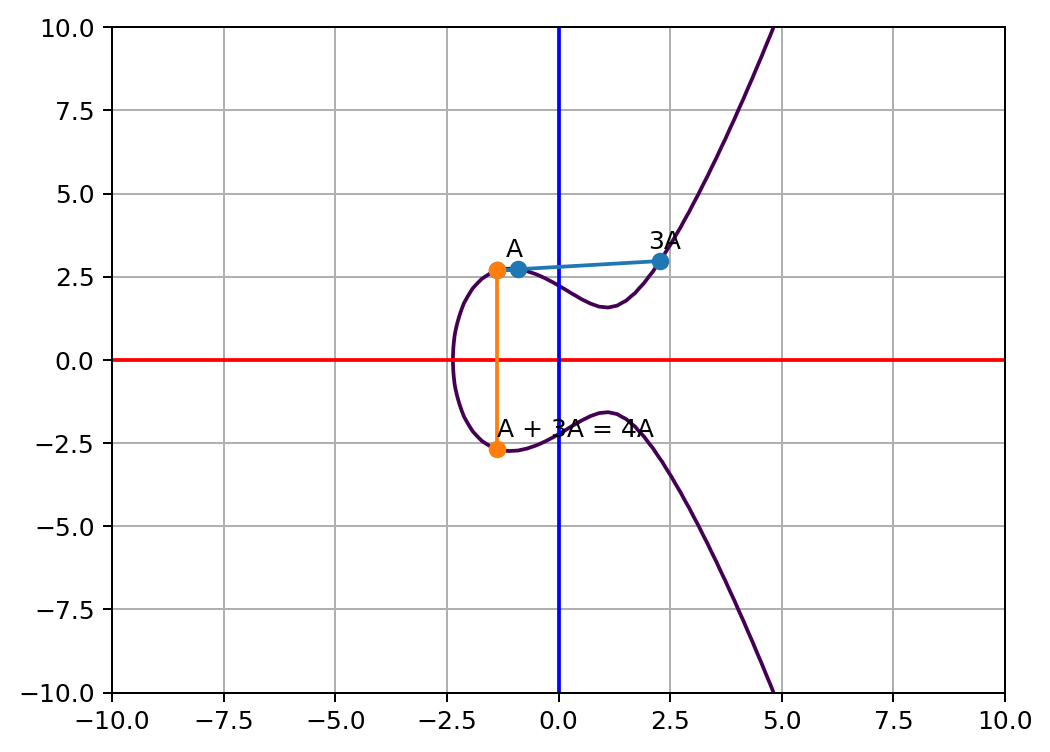

In [14]:
p3 = p.double() + p
plot_distinct_point_curve(-3.5, 5,
    p, p3,
    'A', '3A', '', 'A + 3A = 4A'
)

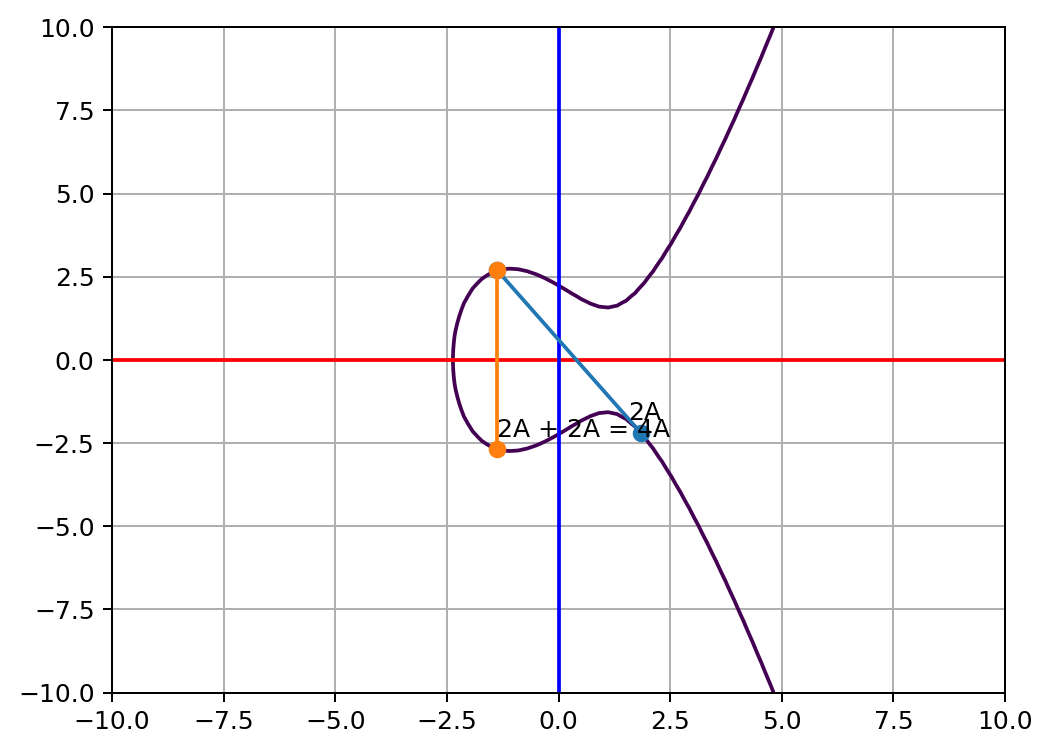

In [15]:
plot_double_point_curve(-3.5, 5,
    p2,
    '2A', '2A + 2A = 4A'
)

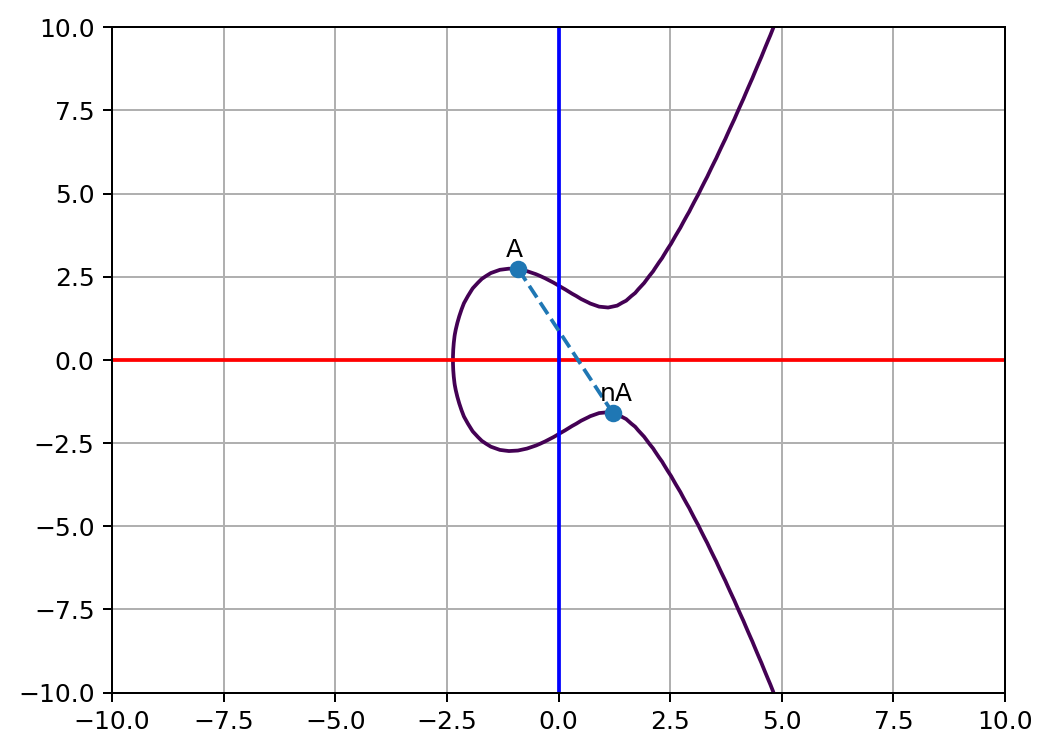

In [16]:
plot_n_point_curve(-3.5, 5,
    p, 11,
    'A', 'nA'
)